In [16]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [17]:
df=pd.read_csv("C:\\Users\\ozlem\\OneDrive\\Masaüstü\\kodluyoruz\\2.hafta\\titanik\\titanik\\hmelq.csv")
data=df.dropna()
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


In [25]:
dms = pd.get_dummies(data[['reason', 'job']])
dms.head()
y = data["bad"]
X_ = data.drop(["bad", "reason", "job"], axis = 1).astype("float64")
X_.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,8400.0,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,17400.0,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [27]:
X = pd.concat([X_, dms[["reason_HomeImp", "job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","job_Self"]]], axis = 1)
X.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,0,1,0,0,0,0,0
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,0,1,0,0,0,0,0
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,0,1,0,0,0,0,0
156,8400.0,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,1,1,0,0,0,0,0
157,17400.0,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,0,1,0,0,0,0,0


In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
cart=DecisionTreeClassifier()
cart_model=cart.fit(X_train,y_train)

In [32]:
cart_grid={"max_depth":range(1,10),"min_samples_split":list(range(2,50))}

In [33]:
cart=tree.DecisionTreeClassifier()
cart_cv=GridSearchCV(cart,cart_grid,cv=10,n_jobs=-1,verbose=2)
cart_cv_model=cart_cv.fit(X_train,y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 2830 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   28.3s finished


In [34]:
print("En iyi parametreler:"+str(cart_cv_model.best_params_))

En iyi parametreler:{'max_depth': 2, 'min_samples_split': 2}


In [35]:
cart=tree.DecisionTreeClassifier(max_depth=2,min_samples_split=2)
cart_tuned=cart.fit(X_train,y_train)

In [36]:
y_pred=cart_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.933993399339934

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       554
           1       0.80      0.31      0.44        52

   micro avg       0.93      0.93      0.93       606
   macro avg       0.87      0.65      0.70       606
weighted avg       0.93      0.93      0.92       606



In [38]:
########### RANDOM FOREST:

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf_model=RandomForestClassifier().fit(X_train,y_train)
rf_model

C:\Users\ozlem\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
y_pred=rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9422442244224423

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       554
           1       0.90      0.37      0.52        52

   micro avg       0.94      0.94      0.94       606
   macro avg       0.92      0.68      0.74       606
weighted avg       0.94      0.94      0.93       606



In [43]:
rf_params={"max_depth":[2,5,8,10],"max_features":[2,5,8],"n_estimators":[10,500,1000],"min_samples_split":[2,5,10]}

In [44]:
rf_model=RandomForestClassifier()
rf_cv_model=GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=5)

In [45]:
rf_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 10.2min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8], 'n_estimators': [10, 500, 1000], 'min_samples_split': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [46]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_split': 2,
 'n_estimators': 10}

In [47]:
rf_tuned=RandomForestClassifier(max_depth=10,max_features=5,min_samples_split=2,n_estimators=10)
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
y_pred=rf_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.9504950495049505

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       554
           1       0.92      0.46      0.62        52

   micro avg       0.95      0.95      0.95       606
   macro avg       0.94      0.73      0.79       606
weighted avg       0.95      0.95      0.94       606



In [50]:
Importance=pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},index=X_train.columns)
Importance

,Importance
loan,8.222886
mortdue,5.685961
value,12.085736
yoj,3.511460
derog,2.897597
delinq,10.615187
clage,8.271710
ninq,3.437098
clno,7.440330
debtinc,33.836073


Text(0.5, 0, 'Dağılım önem düzeyleri')

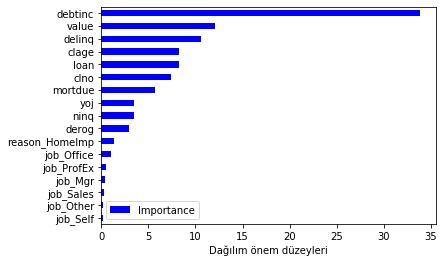

In [51]:
Importance.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh",color="b")
plt.xlabel("Dağılım önem düzeyleri")